# WASP-107

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'WASP-107'

In [3]:
fnames = np.asarray(glob(f'/Users/ch/HST/data/{name}/*.fits'))
obs = om.Observation.from_files(fnames)

In [4]:
obs

TYC-5530-1795-1 [3 Visits]

In [5]:
obs.fit_transit()

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

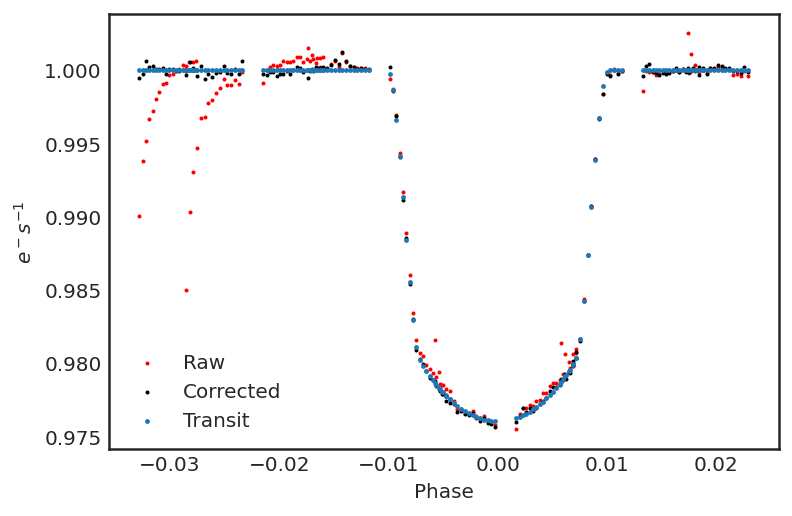

In [6]:
obs.plot()

In [7]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/3 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  33%|███▎      | 1/3 [00:13<00:27, 13.98s/it]

Fitting Transit/Eclipse Model:  67%|██████▋   | 2/3 [00:26<00:13, 13.21s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 3/3 [00:39<00:00, 12.89s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 3/3 [00:39<00:00, 13.05s/it]

<AxesSubplot:title={'center':'TYC-5530-1795-1 Stellar Spectrum'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

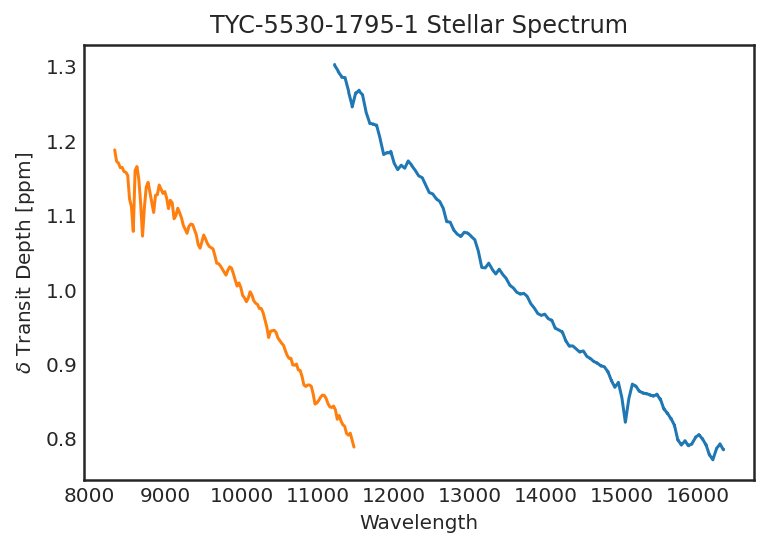

In [8]:
obs.stellar_spectra.plot()

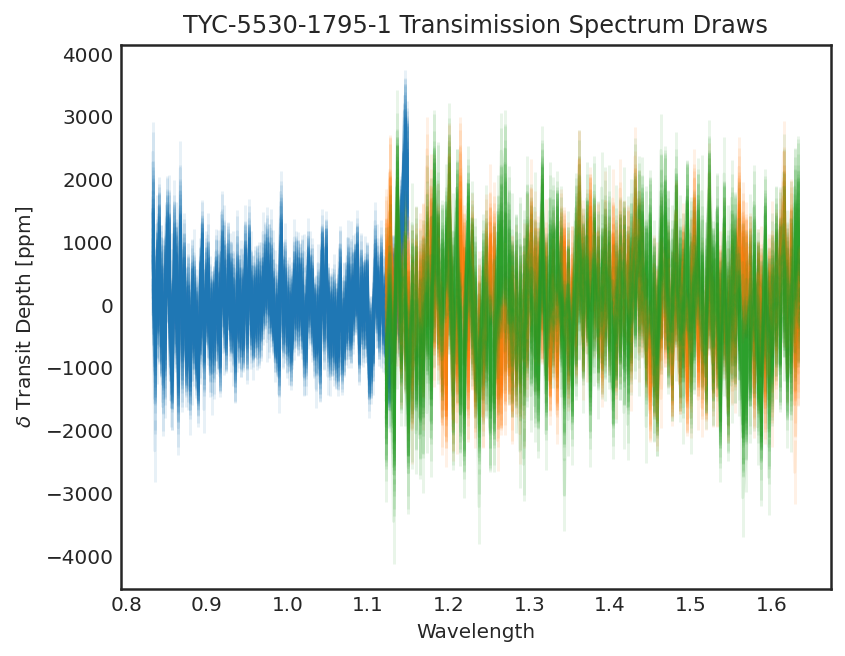

In [9]:
obs.plot_spectra()

[Text(0.5, 1.0, 'WASP-107 Transmission Spectrum')]

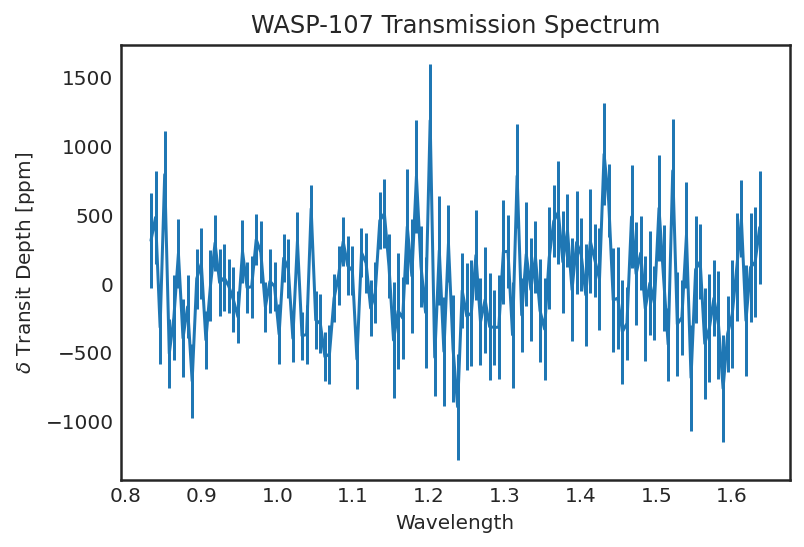

In [10]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title='WASP-107 Transmission Spectrum')

In [11]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

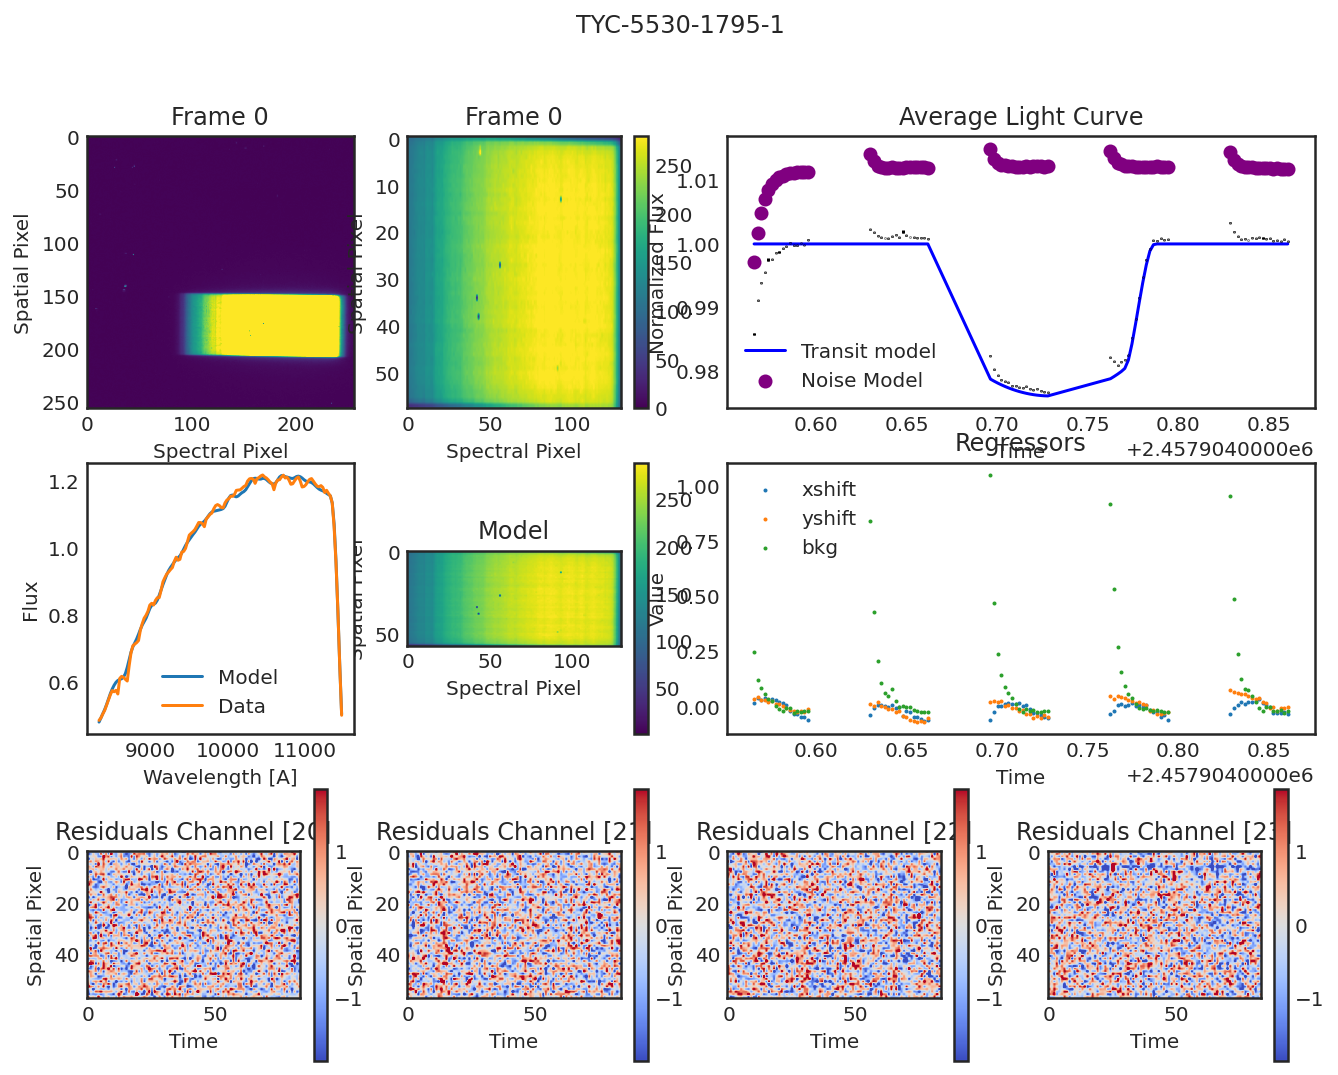

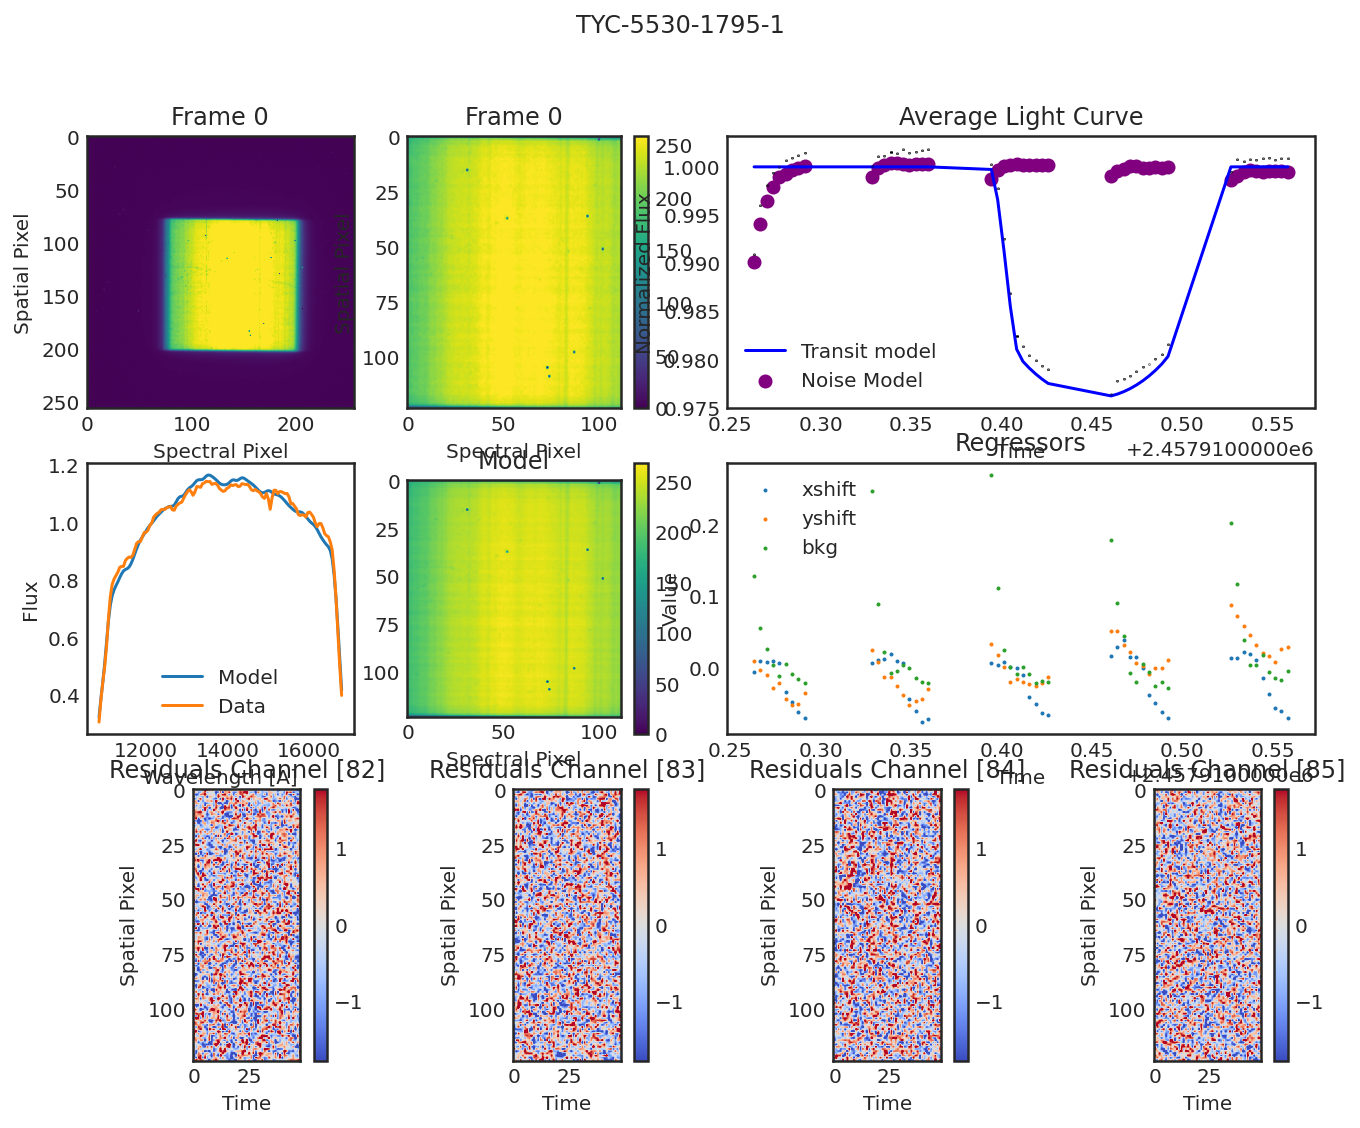

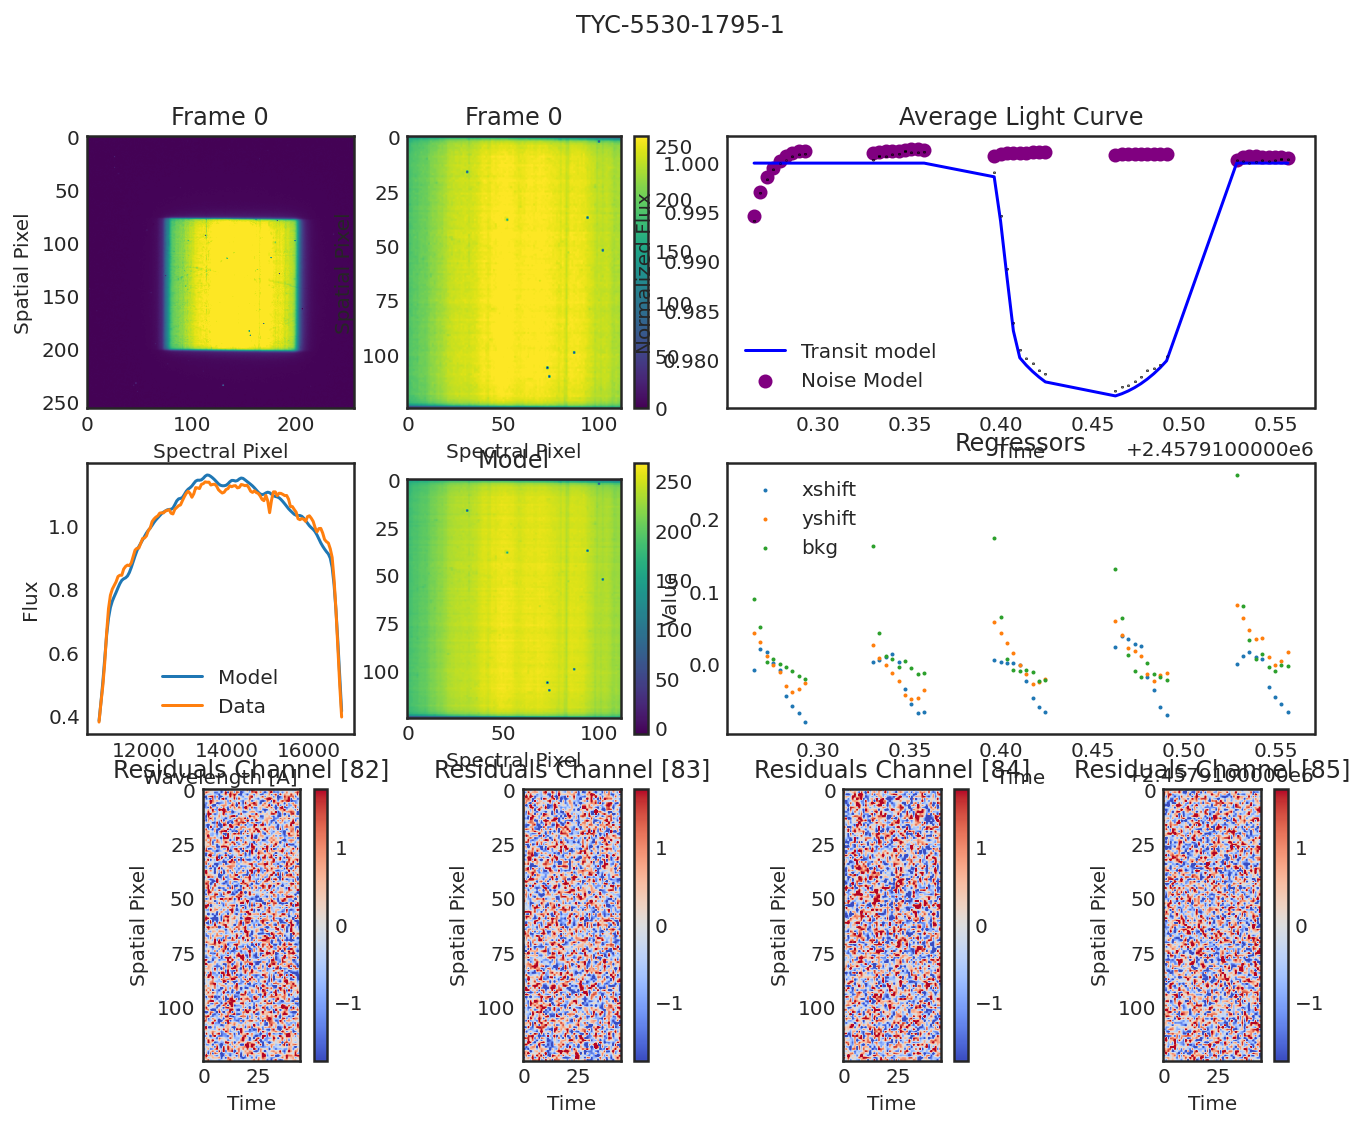

In [12]:
for visit in obs:
    visit.diagnose();
    plt.show();